In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

import sklearn

In [2]:
sklearn.__version__

'0.23.2'

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [3]:
df=pandas.read_csv("Dataframe_melb.csv")
df
#hay que realizar el one hot encoding solo para las variables numericas ya que las variables categoricas
#ya fueron realizada dicha transformacion en el entregable 1

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,Propertycount,zipcode,airbnb_record_count,...,Suburb_Williamstown,Suburb_Williamstown North,Suburb_Windsor,Suburb_Wollert,Suburb_Yallambie,Suburb_Yarraville,Suburb_others,Type_t,Type_u,Type_nan
0,0.25,0.474490,0.052743,0.068577,0.000000,0.25,0.000466,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.25,0.323129,0.052743,0.068577,0.000000,0.00,0.000360,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.50,0.469388,0.052743,0.068577,0.333333,0.00,0.000309,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.50,0.260204,0.052743,0.068577,0.333333,0.25,0.000217,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.75,0.515306,0.052743,0.068577,0.000000,0.50,0.000277,0.176160,0.068577,0.076352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.50,0.169048,0.348101,0.050154,0.333333,0.50,0.000591,0.103967,0.050154,0.005942,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.75,0.394558,0.352321,0.153531,0.333333,0.50,0.001506,0.333769,0.153531,0.055853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.50,0.321769,0.143460,0.016377,0.333333,0.50,0.000769,0.286482,0.016377,0.021687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.50,0.369048,0.143460,0.016377,0.333333,1.00,0.001007,0.286482,0.016377,0.021687,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns[0:11]

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean'],
      dtype='object')

In [5]:
df['Price'].nunique()

2059

In [6]:
#utilizo solo 100 valores de price asi no se hace muy extensa la matriz
df['Price'].round(2).nunique()

100

In [7]:
df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2).nunique().sum()
#agrego solo 407 columnas asi no se hace muy extensa la matriz

408

In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_array=encoder.fit_transform(df[['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']].round(2))
# We can inspect the categories found by the encoder
one_hot_array.shape

(13081, 408)

In [9]:
col_names=encoder.get_feature_names(['Rooms', 'Price', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'Propertycount', 'zipcode', 'airbnb_record_count',
       'airbnb_price_day_mean']) 

In [10]:
one_hot_df=pandas.DataFrame(one_hot_array,columns=col_names)
one_hot_df
#ver como modificar los nombres asi aparecen las de las variables

,Rooms_0.0,Rooms_0.25,Rooms_0.5,Rooms_0.75,Rooms_1.0,Price_0.0,Price_0.02,Price_0.03,Price_0.04,Price_0.05,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_unique = pandas.concat([df,one_hot_df],axis=1)
df_unique=df_unique.drop(["Rooms"],axis=1)
df_unique=df_unique.drop(["Price"],axis=1)
df_unique=df_unique.drop(["Distance"],axis=1)
df_unique=df_unique.drop(["Postcode"],axis=1)
df_unique=df_unique.drop(["Bathroom"],axis=1)
df_unique=df_unique.drop(["Car"],axis=1)
df_unique=df_unique.drop(['Landsize'],axis=1)
df_unique=df_unique.drop(['Propertycount'],axis=1)
df_unique=df_unique.drop(['zipcode'],axis=1)
df_unique=df_unique.drop(['airbnb_record_count'],axis=1)
df_unique=df_unique.drop(['airbnb_price_day_mean'],axis=1)

df_unique


,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.32,airbnb_price_day_mean_0.33,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [12]:
#se vuelve a agregar las variables YearBuilt y BuildingArea al df realizado
melb_df = pandas.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb=melb_df[['YearBuilt', 'BuildingArea']]
melb

,YearBuilt,BuildingArea
0,NaN,NaN
1,1900.0,79.0
2,1900.0,150.0
3,NaN,NaN
4,2014.0,142.0
...,...,...
13575,1981.0,NaN
13576,1995.0,133.0
13577,1997.0,NaN
13578,1920.0,157.0


In [13]:
merged_unique_df = df_unique.merge(
    melb,left_index=True,right_index=True
)
merged_unique_df
#unifico solo la cantidad de datos que tiene el df_unique

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,79.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1900.0,150.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2014.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1960.0,129.0
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1936.0,119.0
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [14]:
merged_unique_df.isna().any().tail(10)
#solo hay valores nulos en las dos variables agregadas

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                      True
BuildingArea                   True
dtype: bool

In [15]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
merged_unique_df = pandas.DataFrame(scaler.fit_transform(merged_unique_df),columns=merged_unique_df.columns)
merged_unique_df

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [16]:
# Inputing 
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
merged_unique_df_imputer = pandas.DataFrame(imputer.fit_transform(merged_unique_df),columns = merged_unique_df.columns)
merged_unique_df_imputer 

,CouncilArea_Bayside,CouncilArea_Boroondara,CouncilArea_Brimbank,CouncilArea_Casey,CouncilArea_Darebin,CouncilArea_Frankston,CouncilArea_Glen Eira,CouncilArea_Greater Dandenong,CouncilArea_Hobsons Bay,CouncilArea_Hume,...,airbnb_price_day_mean_0.34,airbnb_price_day_mean_0.35,airbnb_price_day_mean_0.36,airbnb_price_day_mean_0.4,airbnb_price_day_mean_0.41,airbnb_price_day_mean_0.43,airbnb_price_day_mean_0.62,airbnb_price_day_mean_1.0,YearBuilt,BuildingArea
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.926521,0.012782
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.011633
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.856448,0.022088
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.930170,0.018318
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995134,0.020910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.929440,0.018996
13077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.900243,0.017523
13078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.931873,0.020012
13079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.943552,0.023708


In [17]:
merged_unique_df_imputer.isna().any().tail(10)
#se observa que se realizo la imputacion

airbnb_price_day_mean_0.34    False
airbnb_price_day_mean_0.35    False
airbnb_price_day_mean_0.36    False
airbnb_price_day_mean_0.4     False
airbnb_price_day_mean_0.41    False
airbnb_price_day_mean_0.43    False
airbnb_price_day_mean_0.62    False
airbnb_price_day_mean_1.0     False
YearBuilt                     False
BuildingArea                  False
dtype: bool

#pruebo imputando con KNeighborsRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_unique_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice = mice_imputer.fit_transform(
    melb_data_mice)

<AxesSubplot:title={'center':'\n\n BuildingArea'}, xlabel='BuildingArea', ylabel='Density'>

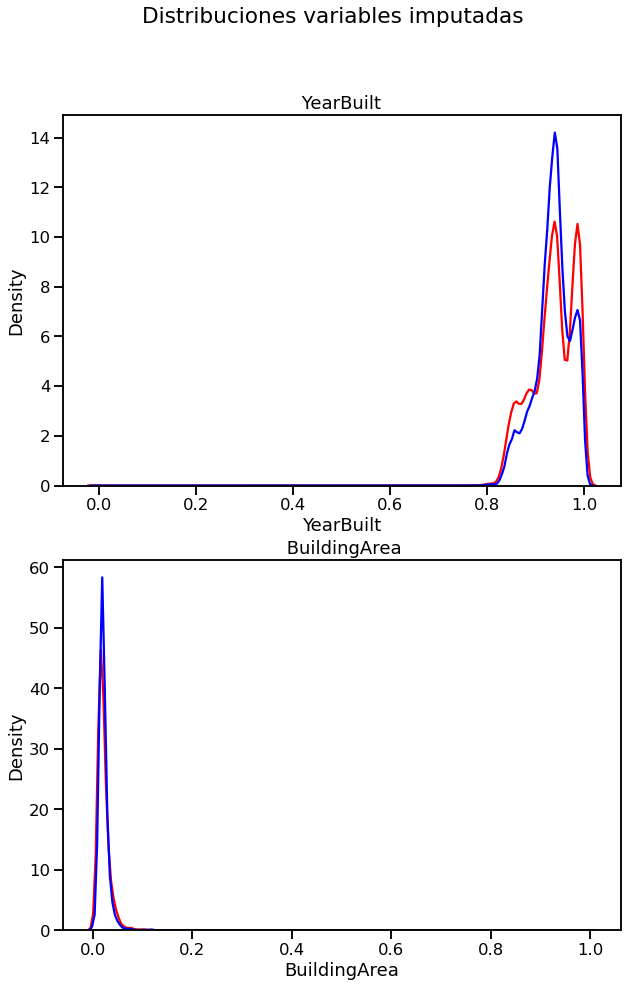

In [18]:
fig, axes = plt.subplots(2, figsize=(10, 15))
fig.suptitle('Distribuciones variables imputadas')
color1='red'
color2='blue'
seaborn.kdeplot(ax=axes[0], x=merged_unique_df['YearBuilt'], color=color1)
axes[0].set_title("\n\n YearBuilt ")
seaborn.kdeplot(ax=axes[0], x=merged_unique_df_imputer['YearBuilt'], color=color2)
#axes[1, 0].set_title("\n\n YearBuilt with knn imputer")

seaborn.kdeplot(ax=axes[1], x=merged_unique_df['BuildingArea'], color=color1)
axes[1].set_title("\n\n BuildingArea")
seaborn.kdeplot(ax=axes[1], x=merged_unique_df_imputer['BuildingArea'], color=color2)
#axes[1, 1].set_title("\n\n BuildingArea with knn imputer")

#seaborn.histplot(ax=axes[2, 0], x=merged_unique_df['YearBuilt'].fillna(value=merged_unique_df['YearBuilt'].mean()),kde=True, color=color1)
#axes[2, 0].set_title("\n\n YearBuilt with fillna imputer")
#seaborn.histplot(ax=axes[2, 1], x=merged_unique_df['BuildingArea'].fillna(value=merged_unique_df['BuildingArea'].mean()),kde=True, color=color2)
#axes[2, 1].set_title("\n\n BuildingArea with fillna imputer")


## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=min(20, merged_unique_df_imputer.shape[0]))
#pca.fit(merged_unique_df_imputer)
proyected_features = pca.fit_transform(merged_unique_df_imputer)
proyected_features.shape

(13081, 20)

In [38]:
pca.explained_variance_ratio_

array([0.07027397, 0.03629365, 0.03221005, 0.02888206, 0.02781078,
       0.02529197, 0.02431299, 0.02232232, 0.02146227, 0.01994974,
       0.0182925 , 0.01743411, 0.01707412, 0.01645716, 0.01549967,
       0.01476816, 0.01458118, 0.01336362, 0.01320566, 0.01281819])

In [30]:
pca.explained_variance_ratio_[0:10].sum()

0.30880980608599284

In [21]:
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)

Principal components
[[-0.01545135 -0.01428476 -0.01418796 ... -0.0022414  -0.0025795
  -0.00029019]
 [ 0.04759359  0.06512632 -0.05836507 ...  0.00106443 -0.00056189
   0.00036719]
 [ 0.0243561  -0.00777796 -0.05900069 ... -0.00212264 -0.001656
  -0.00038257]
 ...
 [-0.00168348 -0.05081558 -0.08097768 ... -0.00633052 -0.00282778
   0.00044937]
 [ 0.11535977 -0.17775754 -0.10879172 ... -0.00486147  0.00476367
   0.00037338]
 [-0.04494164 -0.11933476 -0.01257394 ...  0.00229999  0.00163915
  -0.00080816]]
Explained variance: 
[0.74663768 0.38560806 0.34222117 0.30686234 0.29548029 0.26871882
 0.2583175  0.23716725 0.22802951 0.2119594  0.19435177 0.18523168
 0.18140689 0.17485186 0.16467882 0.15690685 0.15492017 0.14198405
 0.14030574 0.13618906]


In [41]:
pca.components_.shape

(20, 693)

Text(0.5, 0, 'Components')

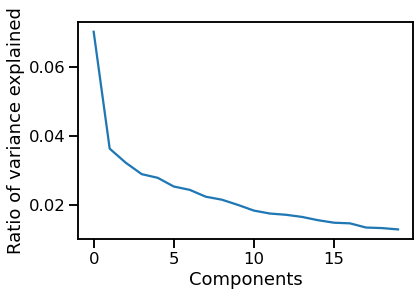

In [23]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_)
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")

<AxesSubplot:ylabel='Count'>

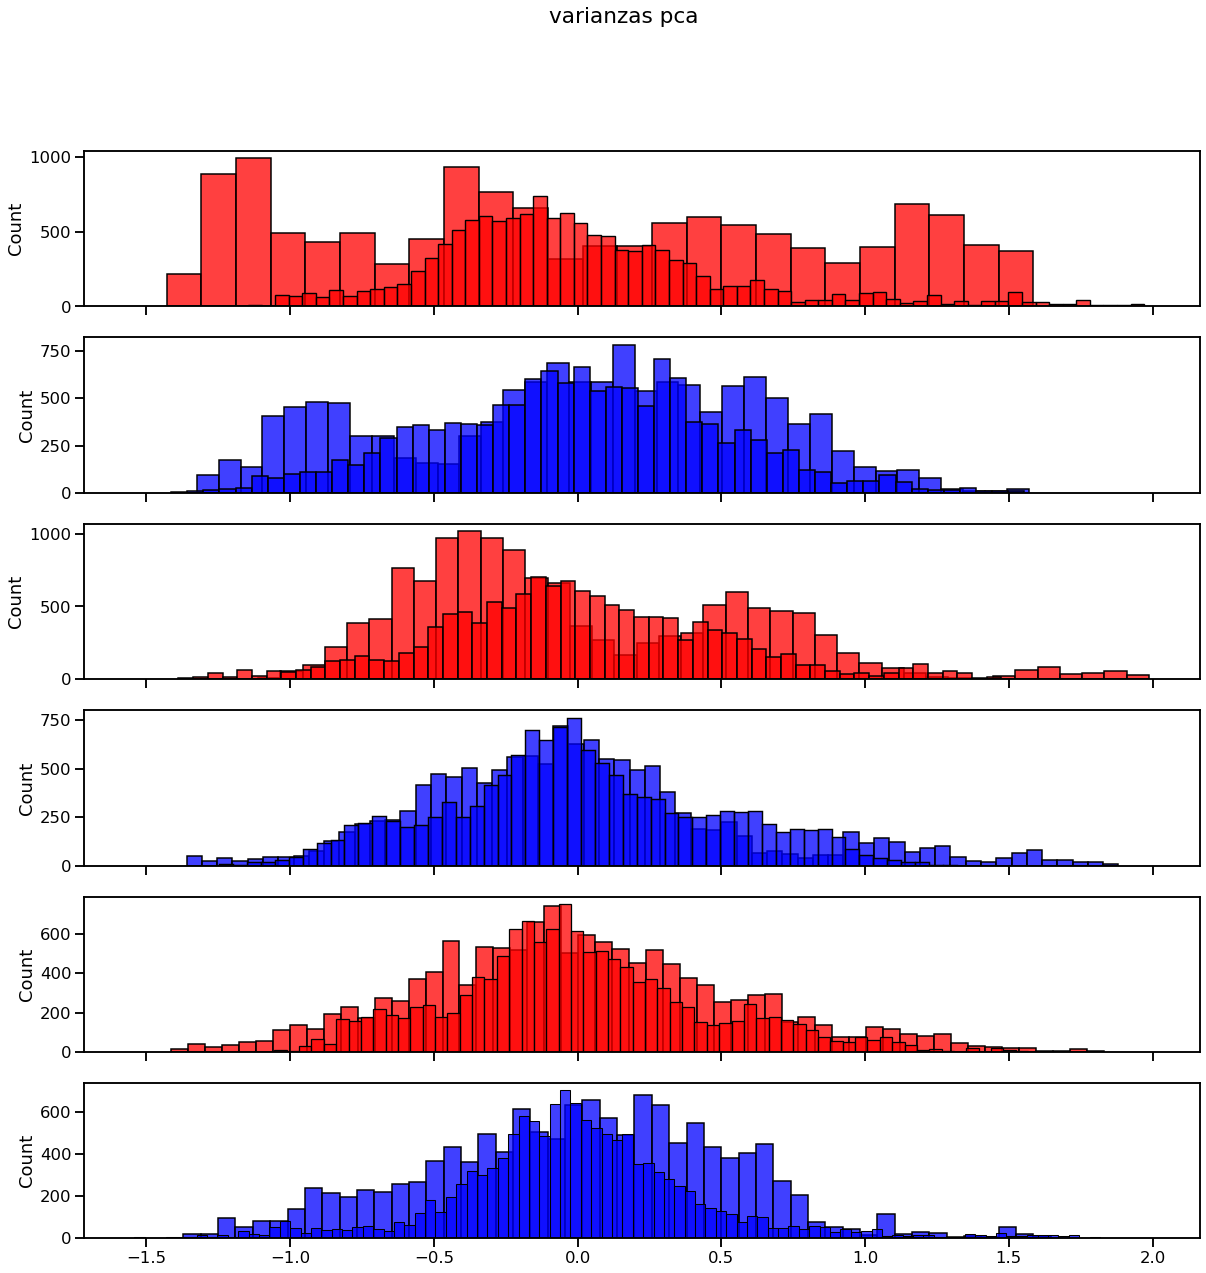

In [55]:
proyected_features
fig, axes = plt.subplots(6, figsize=(20, 20),sharex=True)
fig.suptitle('varianzas pca')
color1='red'
color2='blue'
seaborn.histplot(ax=axes[0], x=proyected_features[:,0], color=color1)
seaborn.histplot(ax=axes[1], x=proyected_features[:,1], color=color2)
seaborn.histplot(ax=axes[2], x=proyected_features[:,2], color=color1)
seaborn.histplot(ax=axes[3], x=proyected_features[:,3], color=color2)
seaborn.histplot(ax=axes[4], x=proyected_features[:,4], color=color1)
seaborn.histplot(ax=axes[5], x=proyected_features[:,5], color=color2)
seaborn.histplot(ax=axes[0], x=proyected_features[:,6], color=color1)
seaborn.histplot(ax=axes[1], x=proyected_features[:,7], color=color2)
seaborn.histplot(ax=axes[2], x=proyected_features[:,8], color=color1)
seaborn.histplot(ax=axes[3], x=proyected_features[:,9], color=color2)
seaborn.histplot(ax=axes[4], x=proyected_features[:,10], color=color1)
seaborn.histplot(ax=axes[5], x=proyected_features[:,11], color=color2)

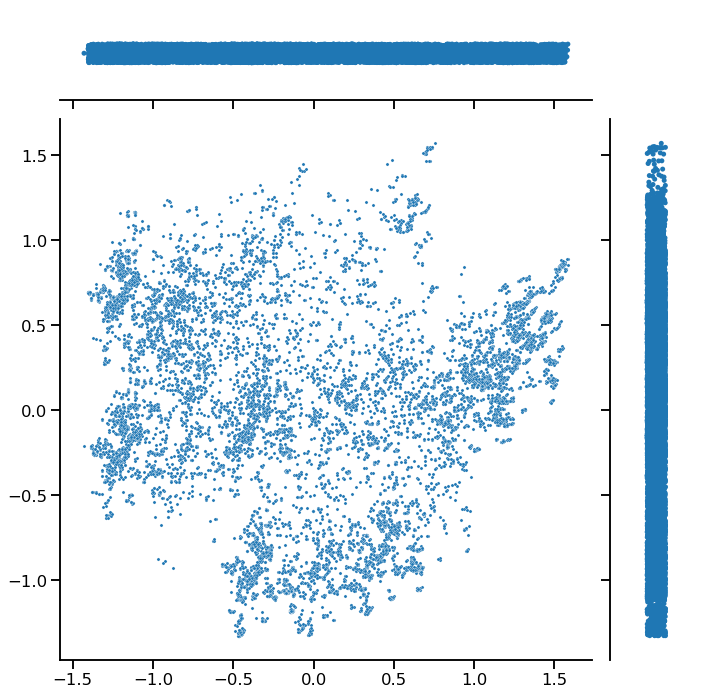

In [57]:
g = seaborn.JointGrid(x=proyected_features[:,0], y=proyected_features[:,1],
                      
                      height=10)
g.plot_joint(seaborn.scatterplot, s=10)
g.plot_marginals(seaborn.stripplot)

In [58]:
merged_unique_df_imputer[['pca1_scaled', 'pca2_scaled','pca3_scaled', 'pca4_scaled','pca5_scaled', 'pca6_scaled',
                         'pca7_scaled', 'pca8_scaled','pca9_scaled', 'pca10_scaled']] = proyected_features[:,0:10]

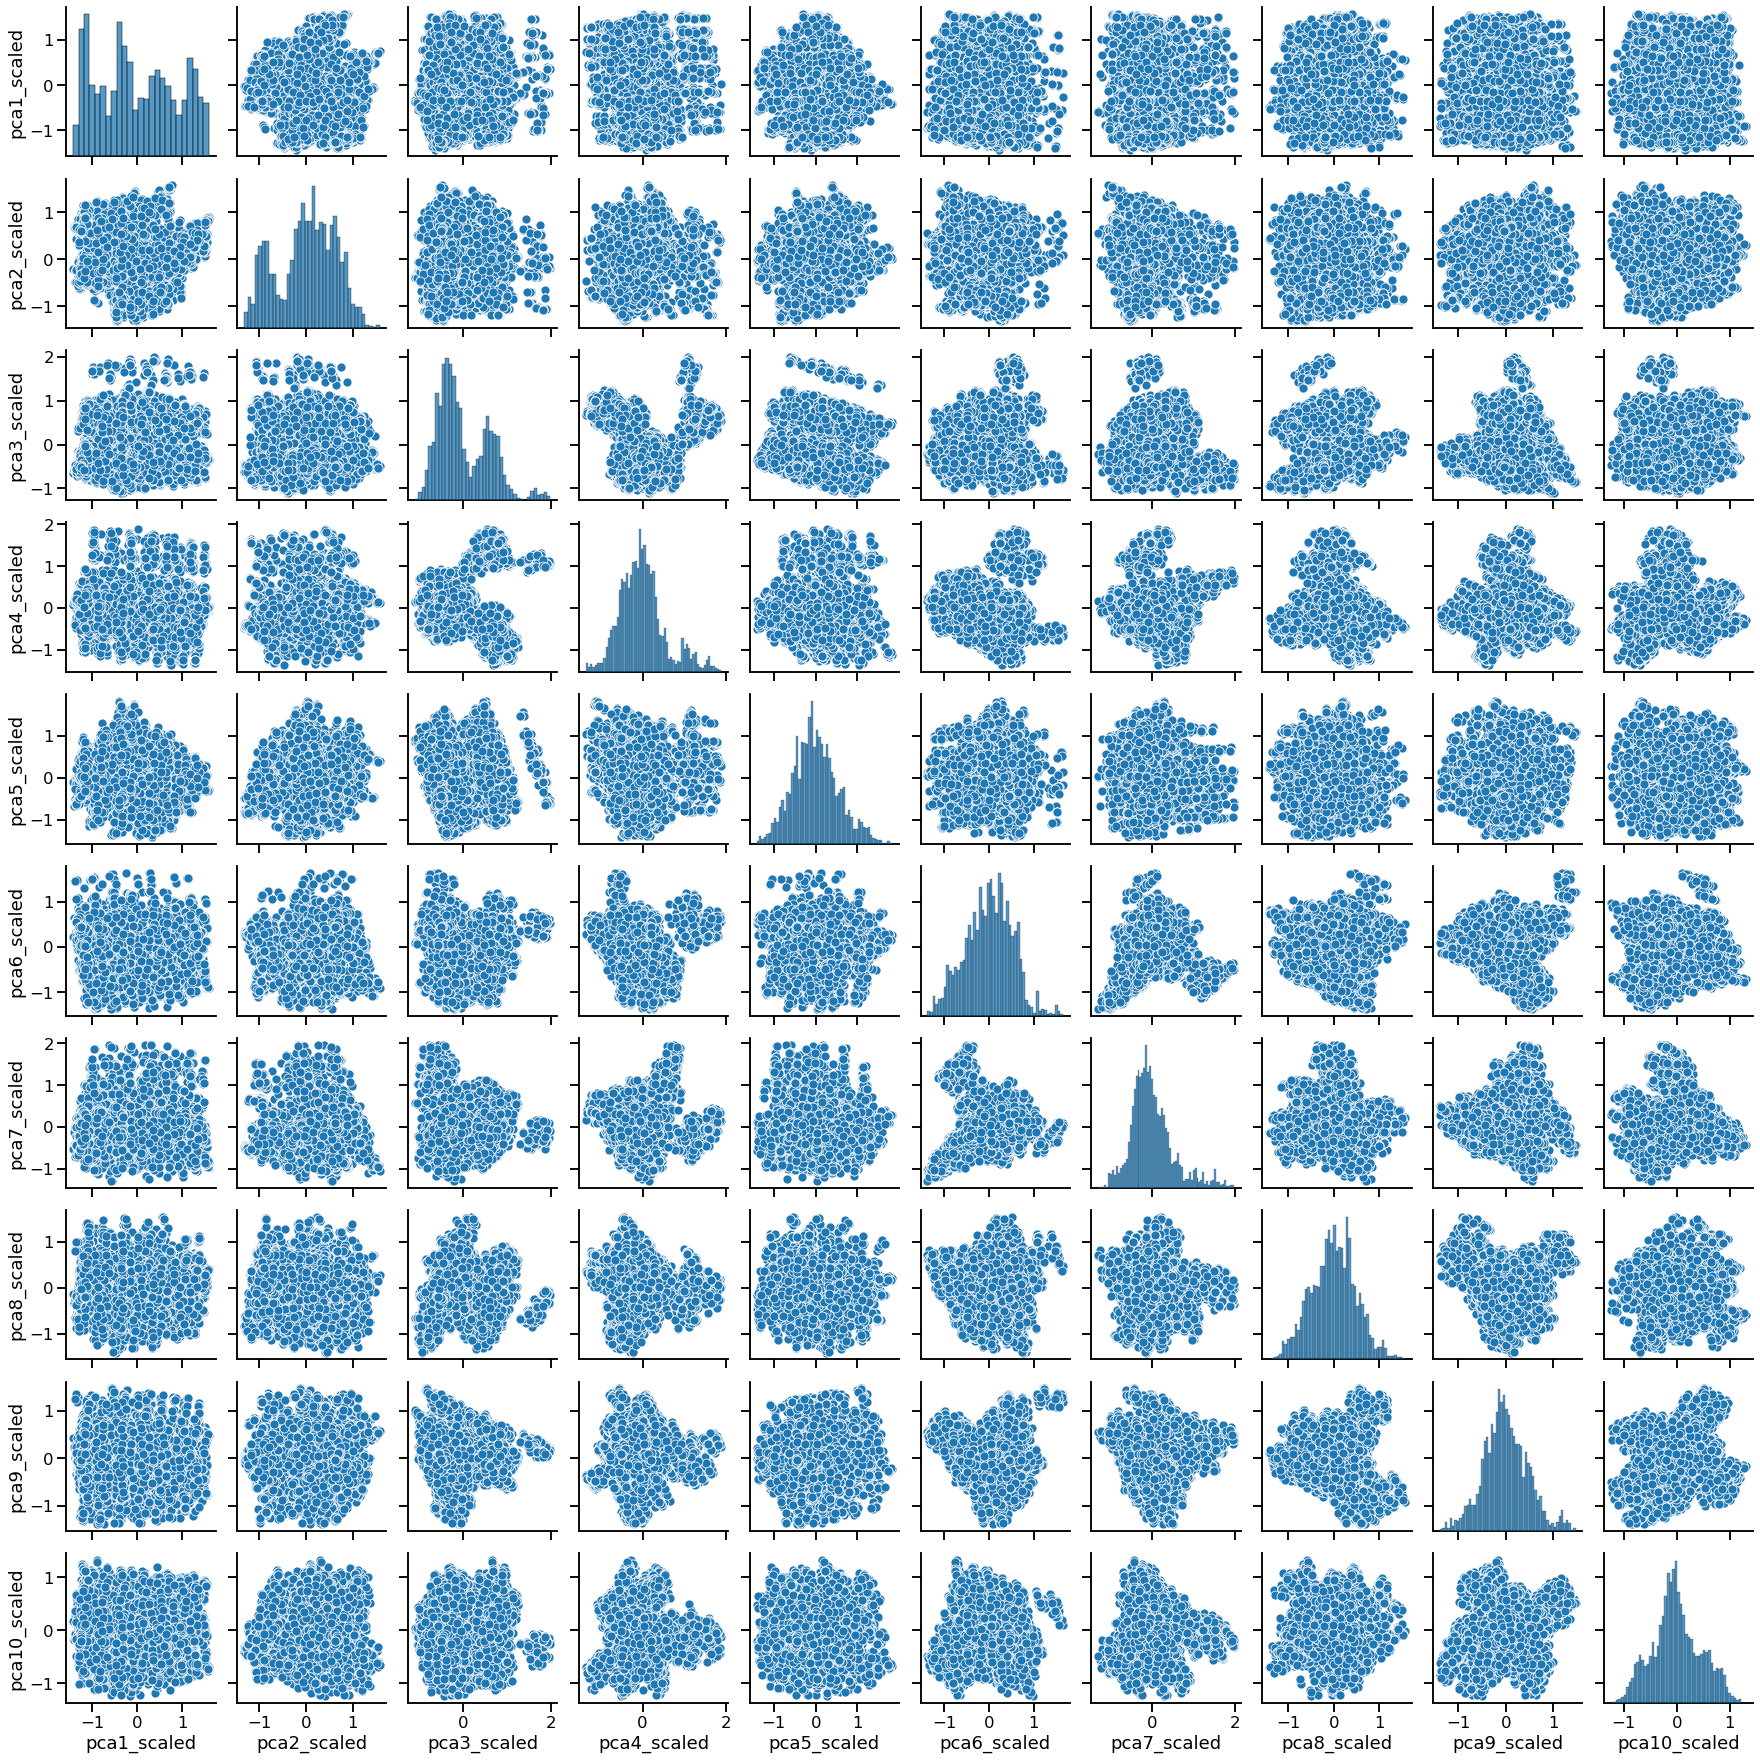

In [61]:
seaborn.pairplot(data=merged_unique_df_imputer,
                x_vars=['pca1_scaled', 'pca2_scaled','pca3_scaled', 'pca4_scaled','pca5_scaled', 'pca6_scaled',
                         'pca7_scaled', 'pca8_scaled','pca9_scaled', 'pca10_scaled'],
                y_vars=['pca1_scaled', 'pca2_scaled','pca3_scaled', 'pca4_scaled','pca5_scaled', 'pca6_scaled',
                         'pca7_scaled', 'pca8_scaled','pca9_scaled', 'pca10_scaled'])

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
    2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```